In [496]:
# import libraries
import pandas as pd

In [497]:
df = pd.read_excel("Data_Train.xlsx")
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


# We have to predict the price of airtickets

# Data Profiling and inspection

### checking the data types

In [498]:
# checking the data types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* data types of dataframe are object and int

### Descritive statistic

In [499]:
df.describe() # for numerical data

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


* total count of price is 10683.
* mean of price is 9087.064121.
* median of price is 8372.
* standard deviation of price is 4611.359167.
* minimum value of price is 1759.
* data falls below 25% is 5277.
* data falls below 75% is 12373.
* maximum value of price is 79512.

In [500]:
df.describe(include="object") # for categorical data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


* there are 12 unique airline and Jet Airways is the most appear with 3849 times
* 18/05/2019 is the most appear date of journey with 504 times
* Delhi is the most appear source  with 4537 times
* Cochin is the most appear destination  with 4537 times
* DEL-BOM-COK is the most appear route  with 2376 times
* most of depature time and arrival are 18:55 and 19:00 respectively.


### Shape

In [501]:
# checking the shape of data
df.shape

(10683, 11)

* total number of rows is 10683.
* total number of columns is 11.

### Overview overall information

In [502]:
# viewing overall information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


* 'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info' are string and 'Price' is int.
* Route has 10682 non-null values 
* Total_Stops has 10682 non-null values 

### Checking null value

In [503]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* Route and Total_Stops has 1 missing value

### Removing null rows

In [504]:
df.isna().any(axis='columns').sum()

1

In [505]:
df.loc[df.isna().any(axis='columns')] # viewing null values row

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [506]:
df.dropna(inplace=True) # removing the null rows

In [507]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Converting Date_of_journy according to datetime

In [508]:
data_of_journey = df["Date_of_Journey"]
data_time  = pd.to_datetime(data_of_journey)
df["Date_of_Journey"] = data_time

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_5796\402176384.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_time  = pd.to_datetime(data_of_journey)


### Extracting month and day and updating in original data

In [509]:
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month # extracting month from Date_of_Journey and adding new columns month with extracted values 
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day # extracting day from Date_of_Journey and adding new columns day with extracted values

In [510]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [511]:
df['month'].dtypes # checking the data types of month

dtype('int32')

### Creating Date_of_journey DataFrame

In [512]:
Date_of_Journey = df.loc[:,["Date_of_Journey"]]
Date_of_Journey["month"] = pd.DatetimeIndex(df['Date_of_Journey']).month
Date_of_Journey["day"] = pd.DatetimeIndex(df['Date_of_Journey']).day
Date_of_Journey.head(2)

,Date_of_Journey,month,day
0,2019-03-24,3,24
1,2019-05-01,5,1


### dropping Data_of_journey from original dataframe

In [513]:
df.drop(columns="Date_of_Journey", inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


### Extracting the  Dep_Time

In [514]:
dep_hours =  pd.DatetimeIndex(df['Dep_Time']).hour # Extracting hours from Dep_Time
dep_minutes =  pd.DatetimeIndex(df['Dep_Time']).minute # Extracting minutes from Dep_Time

### adding depature hours and minutes columns in original data

In [515]:
df['Depature_hour'] = dep_hours # adding new columns Depature_hour with value dep_hours
df['Depature_minute'] = dep_minutes # adding new columns Depature_minute with value dep_minutes

In [516]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Depature_hour,Depature_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


### Creating Dep_Time DataFrame

In [517]:
Dep_Time = df.loc[:,["Dep_Time"]]
Dep_Time["Dep_hour"] = pd.DatetimeIndex(df['Dep_Time']).hour
Dep_Time["Dep_minute"] = pd.DatetimeIndex(df['Dep_Time']).minute
Dep_Time.head(2)

,Dep_Time,Dep_hour,Dep_minute
0,22:20,22,20
1,05:50,5,50


### Droping Dep_Time column from original data

In [518]:
df.drop(columns="Dep_Time", inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Depature_hour,Depature_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


### Extracting arrival time

In [519]:
arr_hour =  pd.DatetimeIndex(df['Arrival_Time']).hour # Extracting hour from Dep_Time
arr_minute =  pd.DatetimeIndex(df['Arrival_Time']).minute # Extracting minute from Dep_Time

### adding arrival hours and minutes columns in original data

In [520]:
df["Arrival_hour"] = arr_hour # adding new column "Arrival_hour" with arr_hour value
df["Arrival_minute"] = arr_minute # adding new column "Arrival_minute" with arr_minute value

In [521]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Depature_hour,Depature_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


### Creating Arrival_Time DataFrame

In [522]:
Arrival_time = df.loc[:,["Arrival_Time"]]
Arrival_time["Arrival_hour"] = arr_hour
Arrival_time["Arrival_minute"] = arr_minute
Arrival_time.head(2)

,Arrival_Time,Arrival_hour,Arrival_minute
0,01:10 22 Mar,1,10
1,13:15,13,15


### droping Arrival_Time from original data

In [523]:
df.drop(columns="Arrival_Time", inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Depature_hour,Depature_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


### Converting duration according to timedelta

In [524]:
df["Duration"] = pd.to_timedelta(df['Duration']) # converting duration according to timedelta and updating values

In [525]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Depature_hour,Depature_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,3,24,22,20,1,10


### Extracting hour and minute from Duration

In [526]:
duration_hour = df["Duration"].dt.components.hours # extracting hour from duration
duration_minute = df["Duration"].dt.components.minutes # extracting minute from duration

### adding new column in original data

In [527]:
df["Duration_hour"] = duration_hour # adding new column "Duration_hour" with duration_hour value
df["Duration_minute"] = duration_minute # adding new column "Duration_minute" with duration_minute value

In [528]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Depature_hour,Depature_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,5,1,5,50,13,15,7,25


### Creating Duration DataFrame

In [529]:
Duration = df.loc[:,["Duration"]]
Duration["Duration_hour"] = duration_hour
Duration["Duration_minute"] = duration_minute
Duration.head(2)

,Duration,Duration_hour,Duration_minute
0,0 days 02:50:00,2,50
1,0 days 07:25:00,7,25


### droping "Duration" column from original data

In [530]:
df.drop(columns="Duration", inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Depature_hour,Depature_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


### Extracting Route from data

In [531]:
route_df = df["Route"]
route_df

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

### sperating route

In [532]:
route_data = [route.split(" → ") for route in route_df]
# route_data = []
# for route in route_df:
#     route_data.append(route.split(" → "))

### assinging different routes

In [533]:
rout_index_len =[len(data) for data in route_data]

In [534]:
# finding maximum route
max_route = max(rout_index_len)

#### Extracting route from original data

In [535]:
route1  = []
route2 = []
route3 = []
route4 = []
route5 = []
route6 = []
for route in route_data:
    if len(route) == 2:
        route1.append(route[0]) 
        route2.append(route[1]) 
        route3.append(None) 
        route4.append(None) 
        route5.append(None) 
        route6.append(None) 
    elif len(route) == 3:
        route1.append(route[0]) 
        route2.append(route[1]) 
        route3.append(route[2]) 
        route4.append(None) 
        route5.append(None) 
        route6.append(None) 
    elif len(route) == 4:
        route1.append(route[0]) 
        route2.append(route[1]) 
        route3.append(route[2]) 
        route4.append(route[3]) 
        route5.append(None) 
        route6.append(None) 
    elif len(route) == 5:
        route1.append(route[0]) 
        route2.append(route[1]) 
        route3.append(route[2]) 
        route4.append(route[3]) 
        route5.append(route[4]) 
        route6.append(None) 

    elif len(route) == 6:
        route1.append(route[0]) 
        route2.append(route[1]) 
        route3.append(route[2]) 
        route4.append(route[3]) 
        route5.append(route[4]) 
        route6.append(route[5]) 

### Creating Route DataFrame

In [536]:
route_dataframe = df.loc[:,["Route"]]
route_dataframe.head(2)

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR


### adding the new column in route_dataframe

In [537]:
route_dataframe["Route1"] = route1
route_dataframe["Route2"] = route2
route_dataframe["Route3"] = route3
route_dataframe["Route4"] = route4
route_dataframe["Route5"] = route5
route_dataframe["Route6"] = route6

In [538]:
route_dataframe.head(3)

,Route,Route1,Route2,Route3,Route4,Route5,Route6
0,BLR → DEL,BLR,DEL,None,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None,None


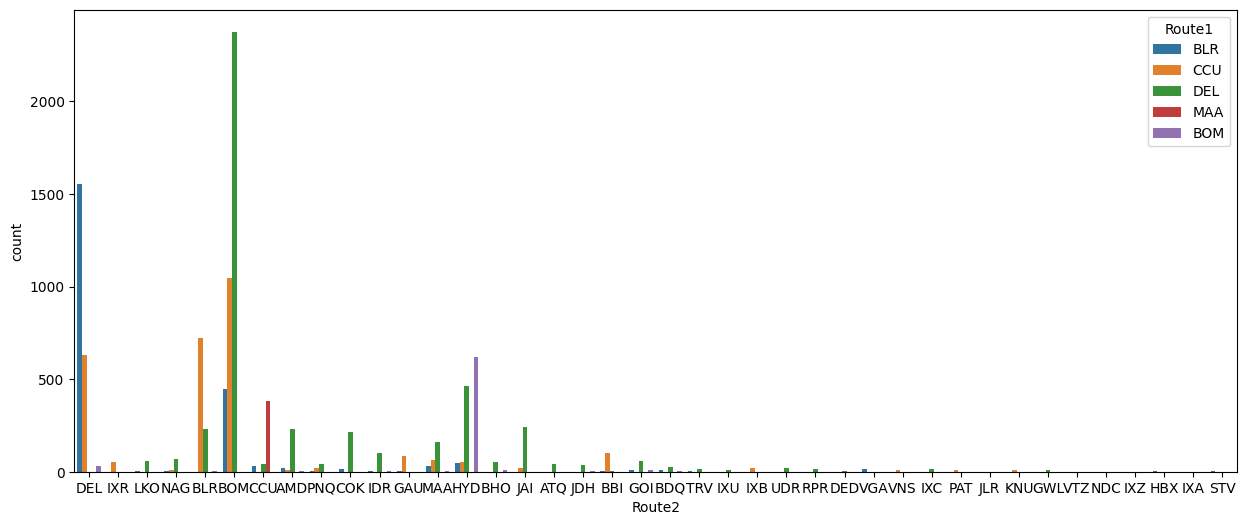

In [539]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(x="Route2", hue="Route1", data=route_dataframe)
plt.show()

In [540]:
route_dataframe.isna().sum()

Route         0
Route1        0
Route2        0
Route3     3491
Route4     9116
Route5    10636
Route6    10681
dtype: int64

* route6 has total 10681 null data
* route5 has total 10636 null data
* route4 has total 9116 null data
* route3 has total 3491 null data

### adding new columns in original data

In [541]:
df["Route1"] = route1
df["Route2"] = route2
df["Route3"] = route3
df["Route4"] = route4
df["Route5"] = route5
df["Route6"] = route6

In [542]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Depature_hour,...,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,...,1,10,2,50,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,...,13,15,7,25,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,...,4,25,19,0,DEL,LKO,BOM,COK,None,None


# route vs total stops

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Route",hue="Total_Stops", data=df)
plt.show()

### droping Route column from  original data

In [ ]:
df.drop(columns="Route", inplace=True)
df.head(3)

### Manipulating Total stops columns in the dataframe

In [ ]:
stop_data = df["Total_Stops"]

In [ ]:
# slicing
new_df = df.loc[:,["Total_Stops"]]
new_df.head()

In [ ]:
# assing new values
list = []
for item in stop_data:
    if item == 'non-stop':
        list.append(0)
    elif item == '1 stop':
        list.append(1)
    elif item == '2 stops':
        list.append(2)
    elif item == '3 stops':
        list.append(3)
    elif item == '4 stops':
        list.append(4)

In [ ]:
# adding new value in total_stops
new_df["Total_Stops"]=list

In [ ]:
new_df.head()

In [ ]:
stop_value = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [ ]:
df["Total_Stops"].map(stop_value)

In [ ]:
df["Total_Stops"].replace(["non-stop","1 stop","2 stops","3 stops","4 stops"],[0,1,2,3,4], inplace=True)

In [ ]:
df.head(3)

### Maniputing additional_info columns from original data

In [ ]:
df["Additional_Info"]

In [ ]:
df["Additional_Info"].unique()

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(x="Price", hue="Additional_Info", data=df)

* Additional_Info also effect the price of tickets.

### Manipulating airline column from original data

In [ ]:
df["Airline"].unique()

In [ ]:
df["Airline"].nunique()

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(x="Price", hue="Airline", data=df)

* Airline also effect the price of tickets.

In [ ]:
airline_data = df["Airline"].value_counts()
airline_data

## Exploratory Data Analysis

* Disturibution of Airline

In [ ]:
plt.figure(figsize=(9,9))
plt.pie(x=airline_data.values, labels=airline_data.index , autopct="%.2f%%")
plt.show()

* 36.03% of flight are cover by the Jet Airways 
* 19.22% of flight are cover by the Indigo
* 16.39% of flight are cover by the Air India 

In [ ]:
# using bar plot
plt.figure(figsize=(15,9))
sns.countplot(x="Airline", data=df)
plt.show()

* data show Jet Airways has highest number of flight

##### Disturibution of Additional_Info

In [ ]:
a_i = df["Additional_Info"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(a_i.values, labels=a_i.index, autopct="%.2f%%")
plt.show()

* 78.11% data has no any information 
* 18.55% data has information about In_flight meal not included
* 3% data has information about No check-in baggage included

#### Destribution of Total_stops

In [ ]:
sns.countplot(x=df["Total_Stops"])

*  1 stop has high count values

### Destribution of Duration_hour and Duration_minute

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["Duration_hour"], hue=df["Duration_minute"])

* flight duration that take 2 hours 50 minutes has more count values
* flight duration that take 1 hour to 3 hour has approximately distributed where remain ra approximately normally distributed

### Destribution of Depature_hour and Depature_minute

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["Depature_hour"], hue=df["Depature_minute"])

* flights are depature takeup 5 hours 23 hours has more count values

### Destribution of Arrival_hour and Arrival_minute

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["Arrival_hour"], hue=df["Arrival_minute"])

* flights mostly arrived in 1hour 20 minute, 4hour 30minute, 12hour 40minute,  18hours 10minutes

# We need to predict  Price of flight
* Airline,	Total_Stops,	Additional_Info,	month,	day,	Depature_hour,	Depature_minute,	Arrival_hour,	Arrival_minute,	Duration_hour, Duration_minute : Independent variable, X , features
* Price : labels, target, y, dependent variables

In [ ]:
## Features selection
X = df.loc[:,["Airline", "Total_Stops", "Additional_Info", "month", "day", "Depature_hour", "Depature_minute", "Arrival_hour", "Arrival_minute", "Duration_hour", "Duration_minute"]]
y = df.Price

In [ ]:
X

* Here, Airline and Additional_Info are categorical data so we need to OneHotEncoding

In [ ]:
X_features = pd.get_dummies(data=X , columns=['Airline','Additional_Info'],drop_first=True,dtype=float)
X_features.head(4)

In [ ]:
X_features.columns

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=40)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

## Modeling: Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

## Prediction

In [ ]:
y_pred = model.predict(X_test)

## coefficient

In [ ]:
m = model.coef_
print(f"The cofficient of data are {m}.")

## Interception

In [ ]:
c = model.intercept_
print(f"The interception of data is {c}.")

## Evalution

#### Mean Square Error

In [ ]:
# calculating mse
def mean_square_error(y_true, y_pred):
    error = y_true - y_pred
    error_sq = [item**2 for item in error]
    mse = (1/len(y_true))* sum(error_sq)
    return mse

In [ ]:
mse = mean_square_error(y_true=y_test, y_pred=y_pred)
print(f"Mean Square error is {round(mse,4)}.")

In [ ]:
# using sklearn libraries
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

#### Root Mean Square Error

In [ ]:
# calculating mser
def mean_square_error_root(y_true, y_pred):
    error = y_true - y_pred
    error_sq = [item**2 for item in error]
    mser = ((1/len(y_true))* sum(error_sq)) ** (1/2)
    return mser

In [ ]:
mser = mean_square_error_root(y_true=y_test, y_pred=y_pred)
print(f"Root Mean Square Error is {round(mser,4)}.")

In [ ]:
# using sklearn libraries
from sklearn.metrics import root_mean_squared_error
mser = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mser

#### Mean Absolute Error

In [ ]:
# calculating mae
def mean_absolute_error(y_true, y_pred):
    error = y_true - y_pred
    error_ab = [(item**2)**(1/2) for item in error]
    mae = ((1/len(y_true))* sum(error_ab))
    return mae

In [ ]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error is {round(mae,4)}.")

In [ ]:
# using sklearn libraries
from sklearn.metrics import mean_absolute_error
maee = mean_absolute_error(y_true=y_test, y_pred=y_pred)
maee

## R Square

In [ ]:
# calculating R square
def r2_score(y_true, y_pred):
    e_r = y_test - y_pred
    e_t = y_test - y_test.mean()
    ssr = [item ** 2 for item in e_r]
    sst = [item ** 2 for item in e_t]
    r2 = 1-(sum(ssr)/ sum(sst))
    return r2

In [ ]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R Square score is {round(r2,4)}.")

In [ ]:
# using sklearn libraries
from sklearn.metrics import r2_score
r_s= r2_score(y_true=y_test, y_pred=y_pred)
r_s